# Travail pratique 4
*INF600F - Traitement d'images (H2022, UQÀM)*

Yan-Alexandre Leclerc LECY20069604 
Pedro-Luis Bernardos BERP01039907

In [53]:
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import color
from skimage import io
from scipy.ndimage.morphology import distance_transform_edt
from skimage.morphology import binary_opening, thin, label
from sklearn.cluster import KMeans
from skimage.feature import hog, peak_local_max
from skimage.morphology import reconstruction
import skimage.measure as measure
from skimage.transform import resize
from skimage.filters import threshold_otsu
from skimage.segmentation import watershed

# Exercice 1 : Reconnaissance de texte

## Partie 1

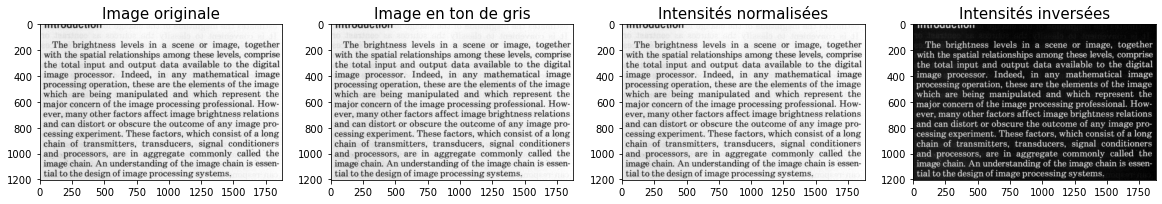

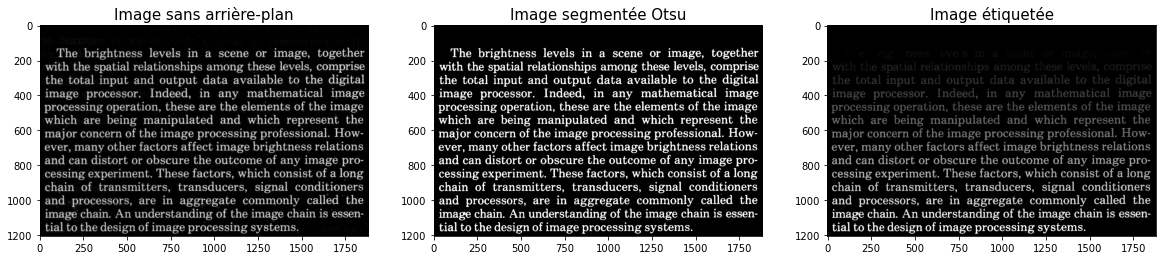

In [54]:
# Lire l'image
img = imageio.imread('tp4_ex1.png')

# Prétraitement
# Convertir en ton de gris + convertir les pixels en floats 
img_gris = img.mean(axis=2).astype(float)

# Normaliser l'intensité
img_norm = img_gris / np.max(img_gris)

# Inverser les intensités
img_inverse = np.abs(img_norm -1)

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title('Image originale', fontsize=15)
plt.imshow(img, cmap='gray')
plt.subplot(142)
plt.title('Image en ton de gris', fontsize=15)
plt.imshow(img_gris, cmap='gray')
plt.subplot(143)
plt.title('Intensités normalisées', fontsize=15)
plt.imshow(img_norm, cmap='gray')
plt.subplot(144)
plt.title('Intensités inversées', fontsize=15)
plt.imshow(img_inverse, cmap ='gray');
plt.show()

# Segmentation
# Retirer l'arriere plan de l'image + retirer les bordures
source = np.copy(img_inverse)
source[1:-1, 1:-1] = img_inverse.min()
masque = img_inverse
dilatation = reconstruction(source, masque, method='dilation')
img_noBG = img_inverse - dilatation

# Otsu
otsu = threshold_otsu(img_noBG)
img_otsu=(img_noBG > otsu)

# Étiquetage de l'image
img_etiquette = measure.label(img_otsu)
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Image sans arrière-plan', fontsize=15)
plt.imshow(img_noBG, cmap='gray')
plt.subplot(132)
plt.title('Image segmentée Otsu', fontsize=15)
plt.imshow(img_otsu, cmap='gray')
plt.subplot(133)
plt.title('Image étiquetée', fontsize=15)
plt.imshow(img_etiquette, cmap='gray')
plt.show()

# Détecter les lettres
lettres = []
for region in measure.regionprops(img_etiquette):
    minr, minc, maxr, maxc = region.bbox
    lettres.append(img_otsu[minr:maxr, minc:maxc])
for i in range(len(lettres)):
    lettres[i] = np.pad(lettres[i], pad_width=3, mode='constant', constant_values=0)
    lettres[i] = resize(lettres[i], (24,24))

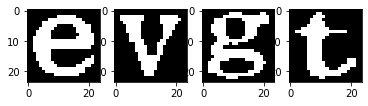

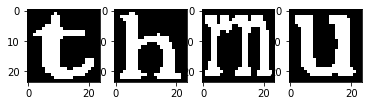

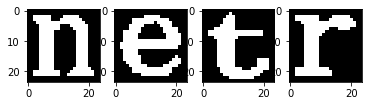

724


In [55]:
# Visualiser au hasard les lettres
def display_randomImages(images_ar):
    selection = []
    for i in range(12):
        x = random.randint(0, len(images_ar))
        selection.append(images_ar[x])
    plt.subplot(141)
    plt.imshow(selection[0], cmap='gray')
    plt.subplot(142)
    plt.imshow(selection[1], cmap='gray')
    plt.subplot(143)
    plt.imshow(selection[2], cmap='gray')
    plt.subplot(144)
    plt.imshow(selection[3], cmap='gray')
    plt.show()
    plt.subplot(141)
    plt.imshow(selection[4], cmap='gray')
    plt.subplot(142)
    plt.imshow(selection[5], cmap='gray')
    plt.subplot(143)
    plt.imshow(selection[6], cmap='gray')
    plt.subplot(144)
    plt.imshow(selection[7], cmap='gray')
    plt.show()
    plt.subplot(141)
    plt.imshow(selection[8], cmap='gray')
    plt.subplot(142)
    plt.imshow(selection[9], cmap='gray')
    plt.subplot(143)
    plt.imshow(selection[10], cmap='gray')
    plt.subplot(144)
    plt.imshow(selection[11], cmap='gray')
    plt.show()
    return selection

# Nombre de lettres
rand = display_randomImages(lettres)
print(len(lettres))

# Question : Combien de lettres avez-vous détectées dans cette image ?

Nous avons détecté 724 lettres dans l'image.

# Question : En observant les lettres segmentées, pouvez-vous identifier des situations pour lesquelles le pipeline de traitement d’images proposé plus haut échoue à extraire une lettre isolée ? Que suggérez-vous pour améliorer les performances de l’extraction des lettres ?

Certaines lettres sont trop collées sur leurs voisines, elles sont donc comptées comme une seule lettre dans le pipeline. Les signes de ponctuation sont également détecté comme une lettre, ce qui influence le résultat de visualisation. Pour améliorer les performances, la segmentation par ligne de partage des eaux (Watershed) permetterait de régler la problématique des lettres distincte.

## Partie 2

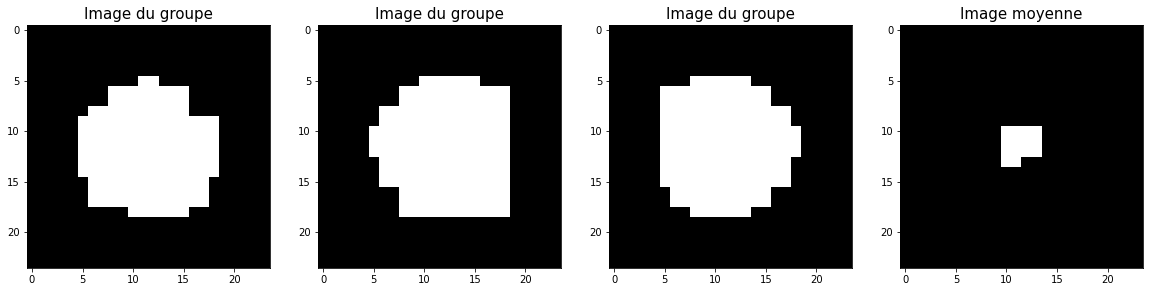

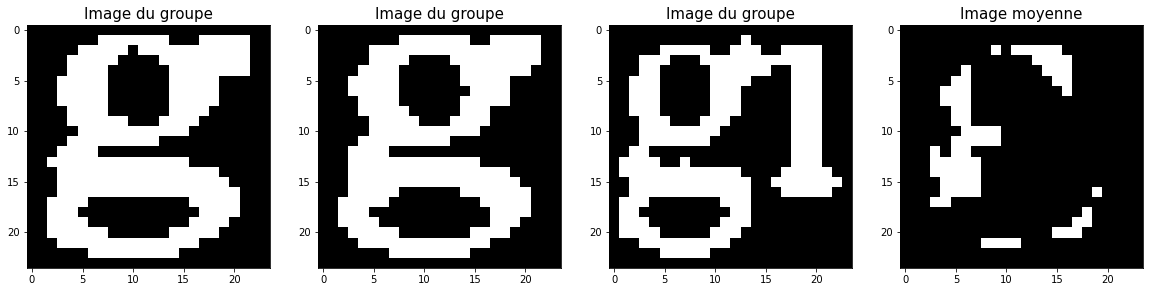

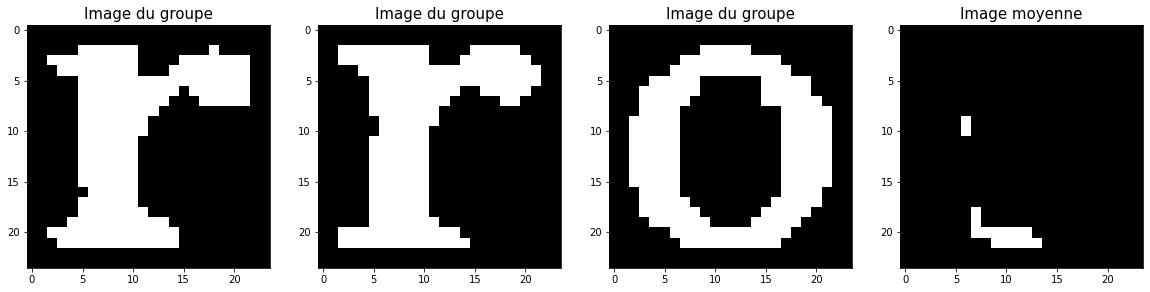

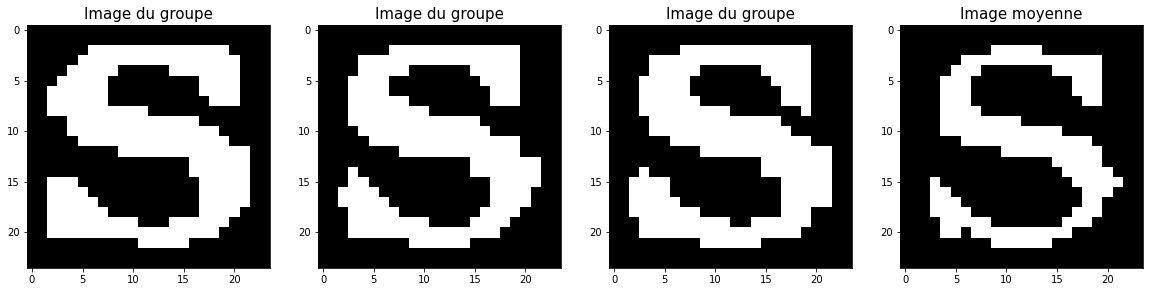

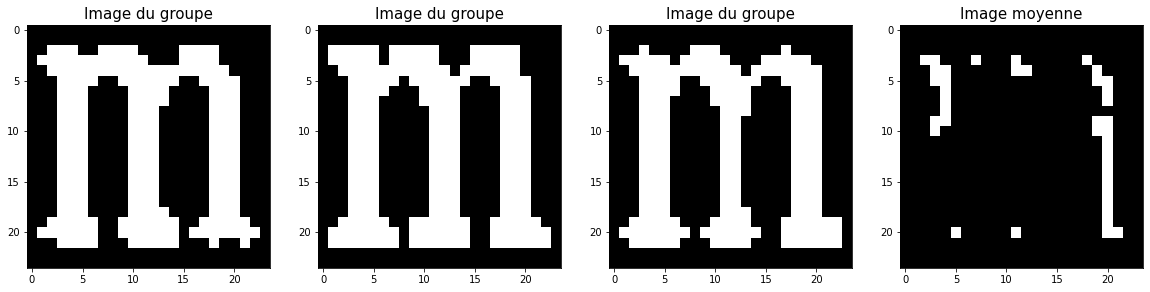

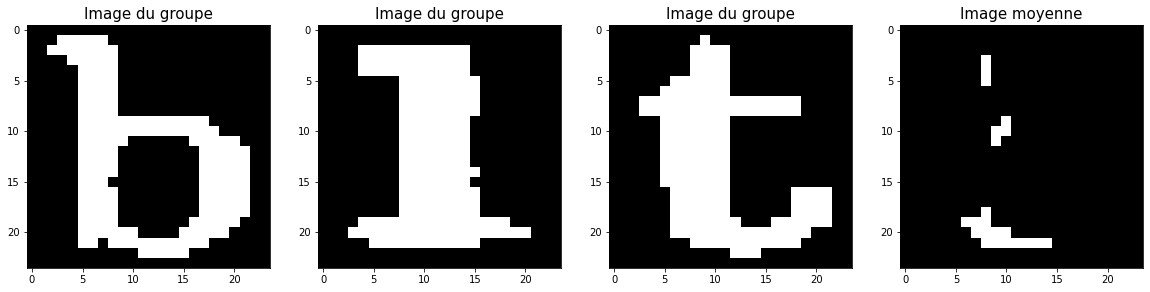

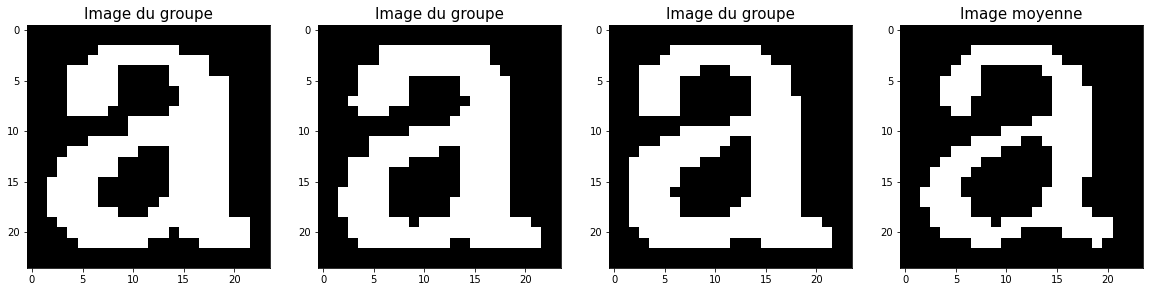

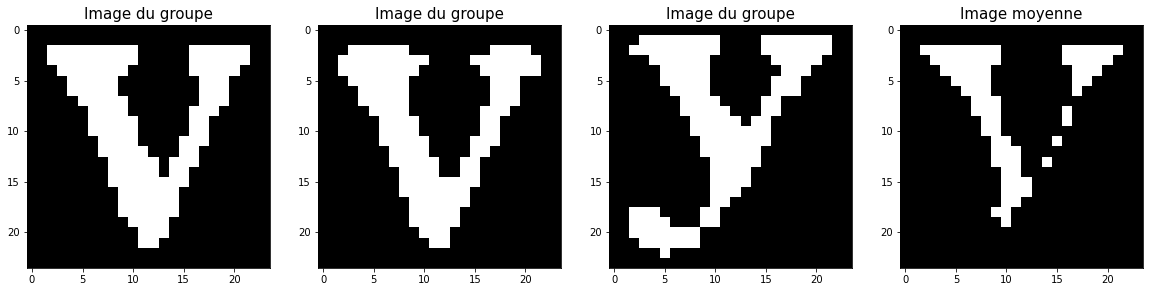

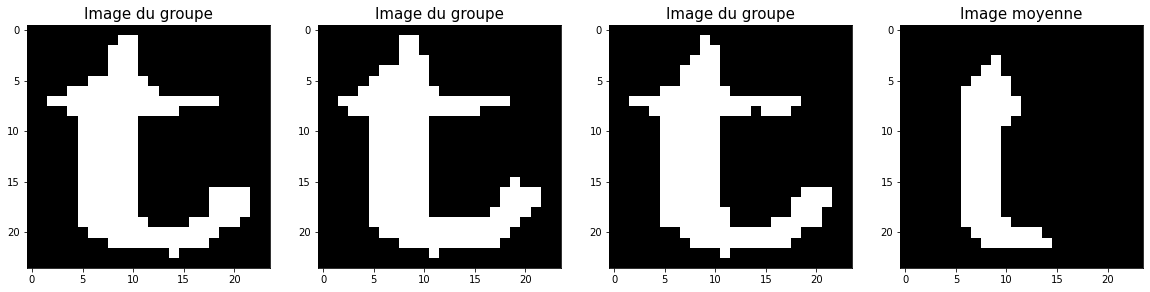

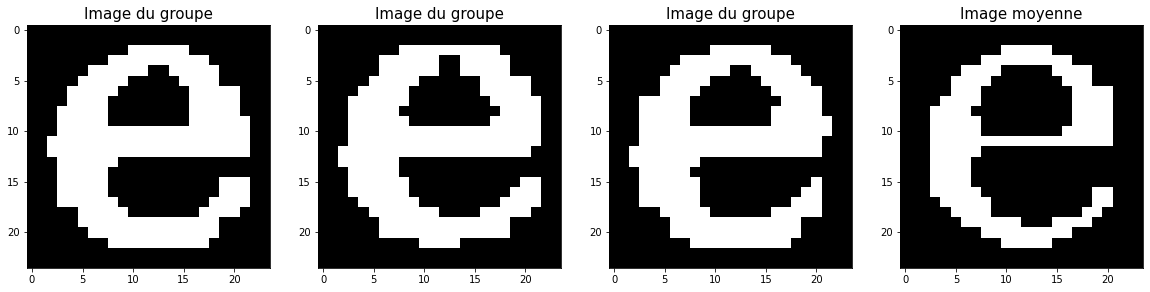

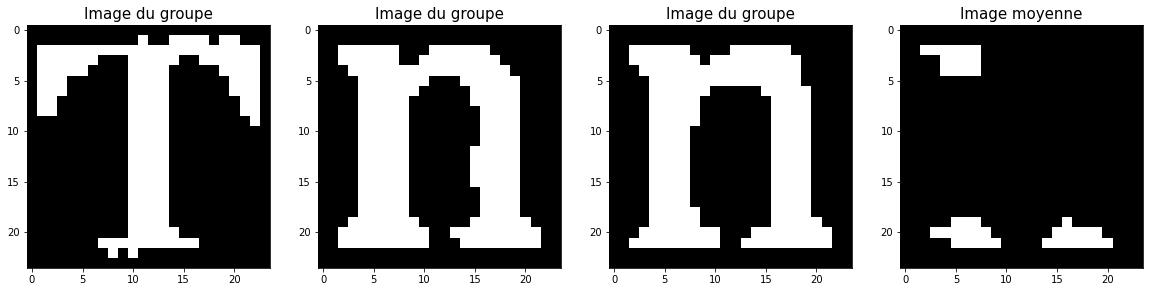

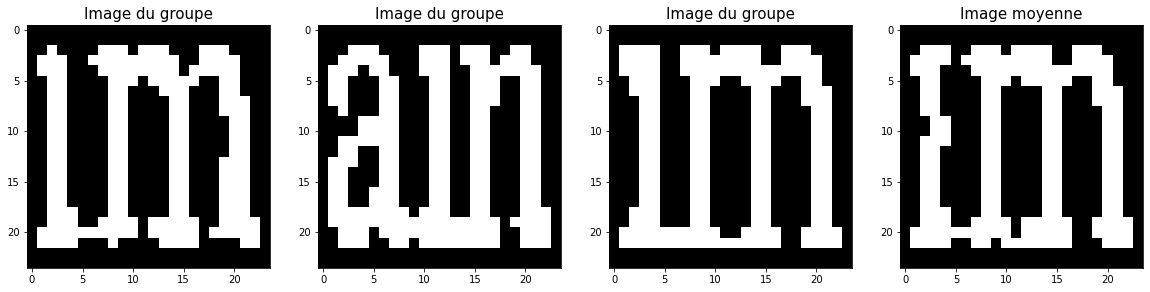

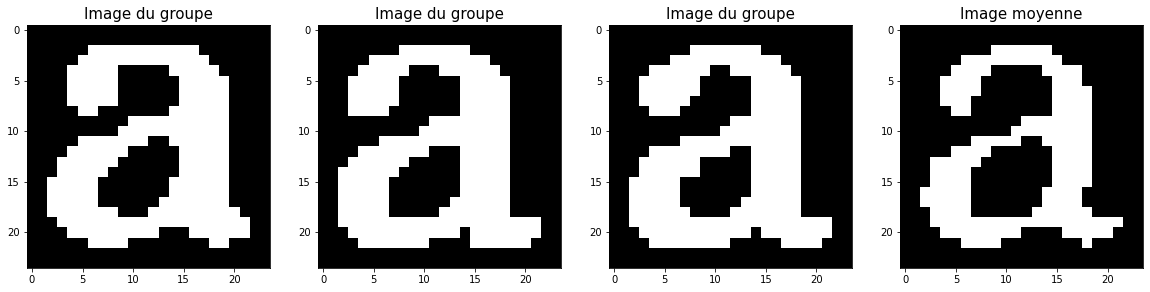

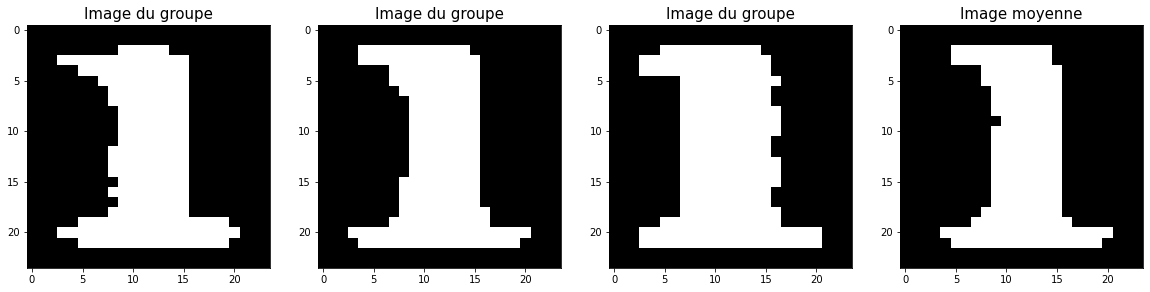

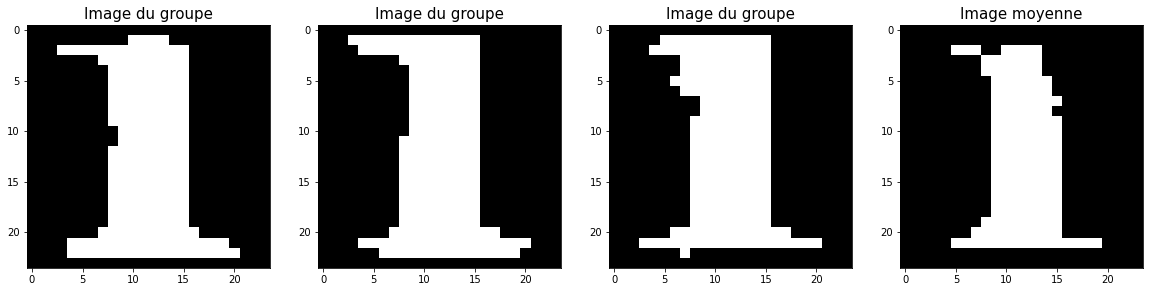

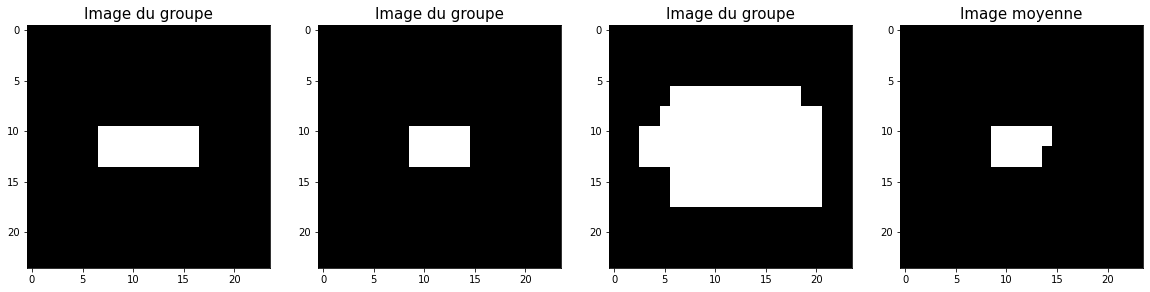

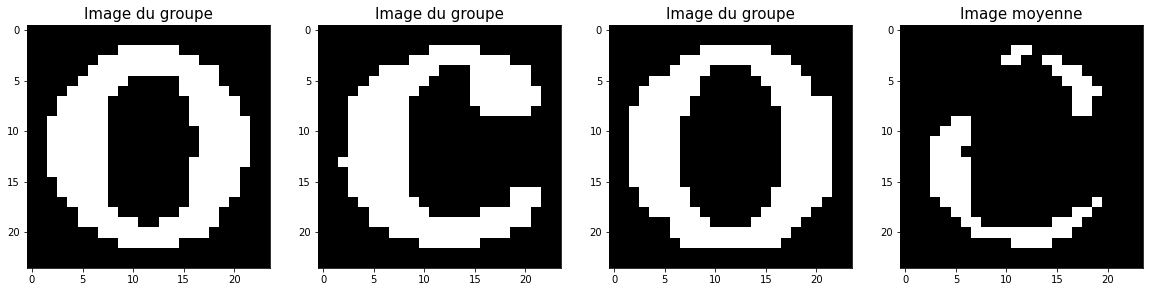

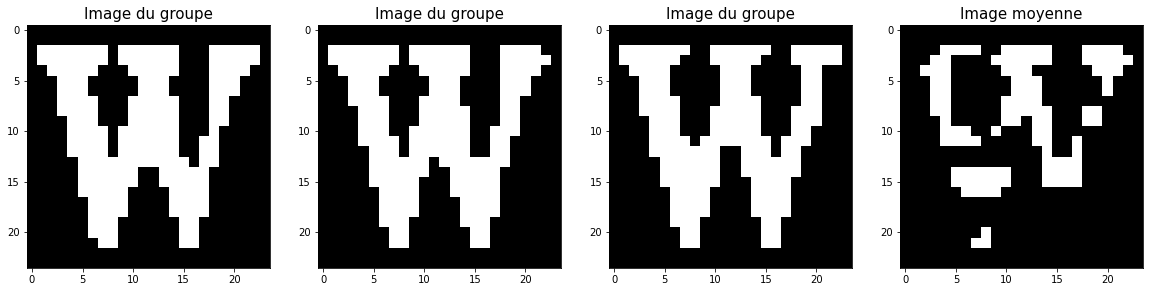

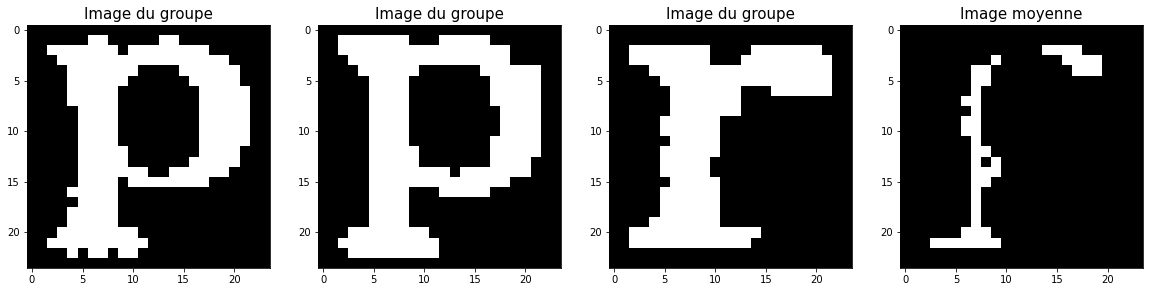

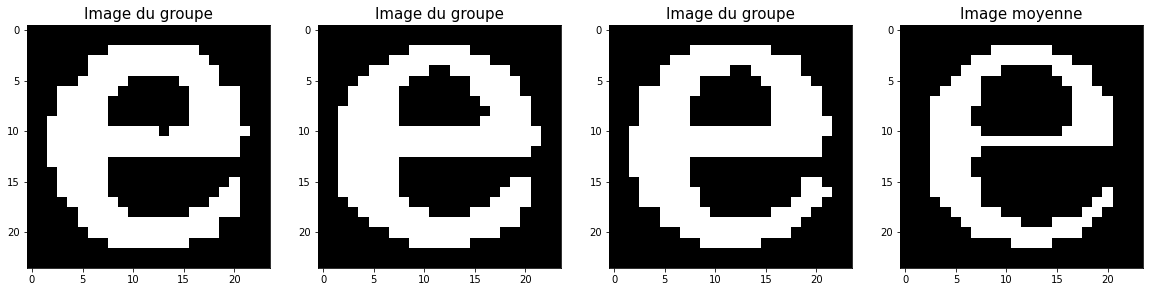

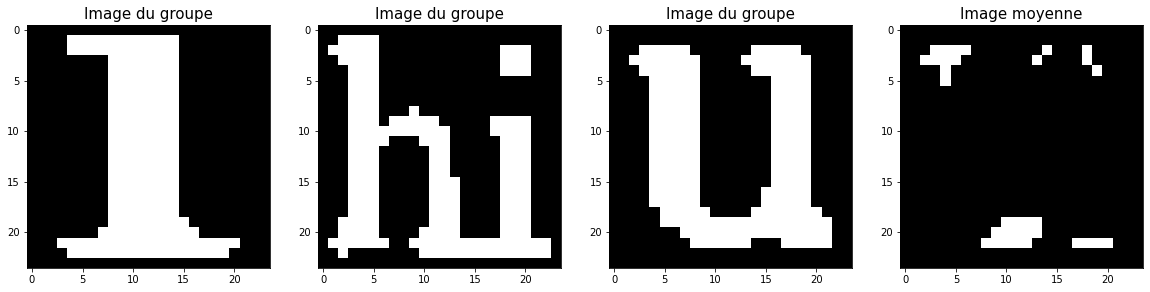

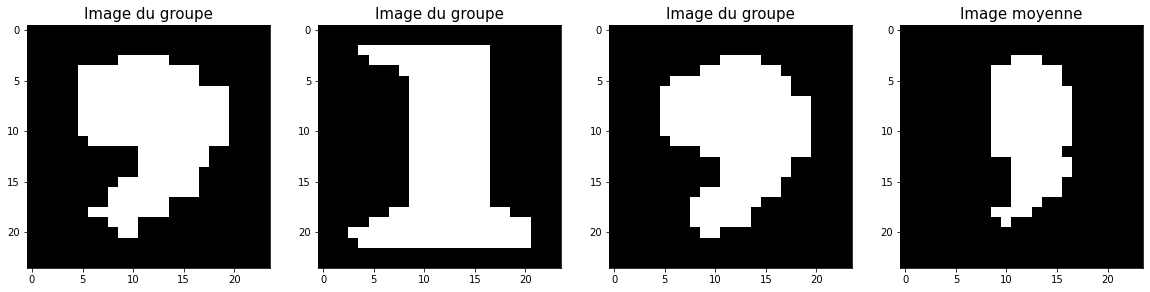

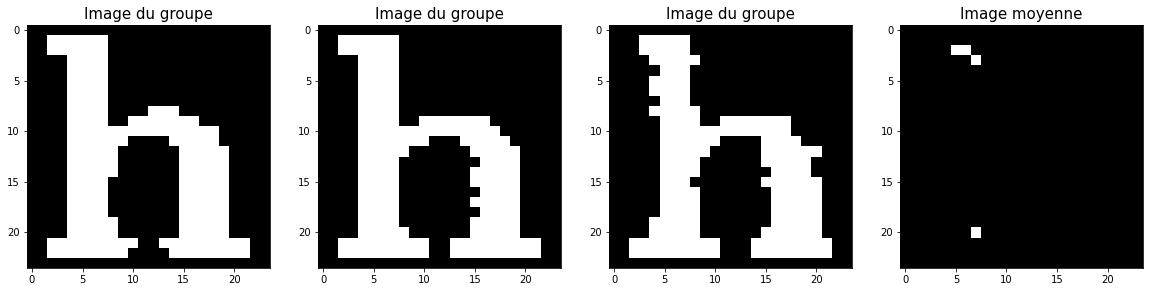

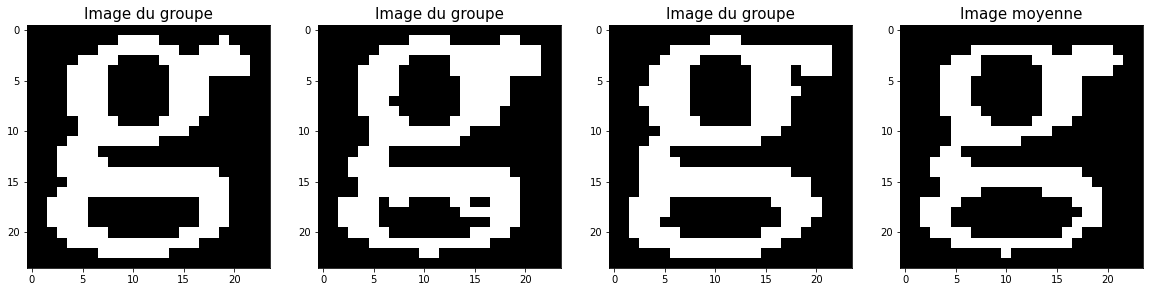

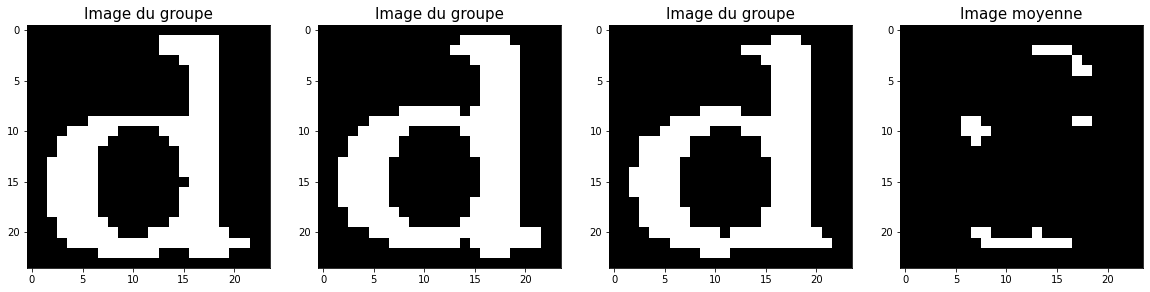

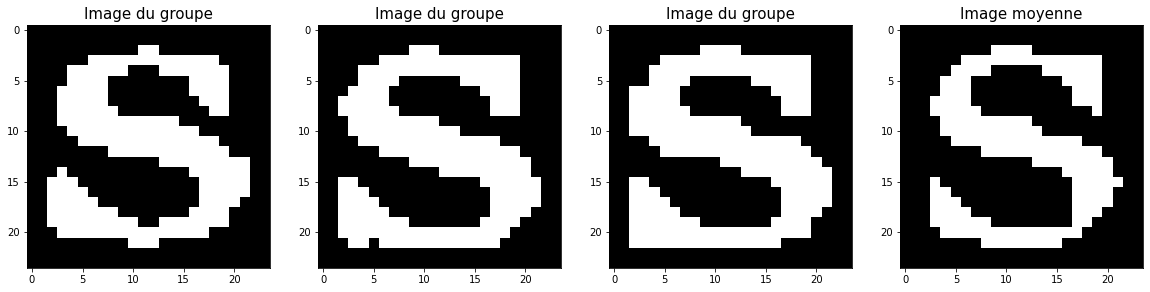

In [56]:
f, hog_l = hog(lettres[0], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False) 
X = np.array(hog_l.flatten())

for i in range (1, len(lettres)):
    fd, hog_image = hog(lettres[i], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
    nouv = np.array(hog_image.flatten())
    X = np.vstack((X, nouv))

modele = KMeans(n_clusters=26).fit(X)

def init_groupe(no_groupe, modele):
    arr = []
    for i in range (len(modele)):
        if modele[i] == no_groupe:
            arr.append(i)
    return arr

groupe1 = init_groupe(0, modele.labels_)
groupe2 = init_groupe(1, modele.labels_)
groupe3 = init_groupe(2, modele.labels_)
groupe4 = init_groupe(3, modele.labels_)
groupe5 = init_groupe(4, modele.labels_)
groupe6 = init_groupe(5, modele.labels_)
groupe7 = init_groupe(6, modele.labels_)
groupe8 = init_groupe(7, modele.labels_)
groupe9 = init_groupe(8, modele.labels_)
groupe10 = init_groupe(9, modele.labels_)
groupe11 = init_groupe(10, modele.labels_)
groupe12 = init_groupe(11, modele.labels_)
groupe13 = init_groupe(12, modele.labels_)
groupe14 = init_groupe(13, modele.labels_)
groupe15 = init_groupe(14, modele.labels_)
groupe16 = init_groupe(15, modele.labels_)
groupe17 = init_groupe(16, modele.labels_)
groupe18 = init_groupe(17, modele.labels_)
groupe19 = init_groupe(18, modele.labels_)
groupe20 = init_groupe(19, modele.labels_)
groupe21 = init_groupe(20, modele.labels_)
groupe22 = init_groupe(21, modele.labels_)
groupe23 = init_groupe(22, modele.labels_)
groupe24 = init_groupe(23, modele.labels_)
groupe25 = init_groupe(24, modele.labels_)
groupe26 = init_groupe(25, modele.labels_)

def afficher_images (groupe):
    compte = 0
    moy = lettres[groupe[0]]
    for i in range(1, len(groupe)):
        moy = moy + lettres[groupe[i]]
        compte += 1
    moy = moy // compte
    plt.figure(figsize=(20,20))
    plt.subplot(141)
    plt.title('Image du groupe', fontsize=15)
    plt.imshow(lettres[groupe[0]], cmap='gray')
    plt.subplot(142)
    plt.title('Image du groupe', fontsize=15)
    plt.imshow(lettres[groupe[1]], cmap='gray')
    plt.subplot(143)
    plt.title('Image du groupe', fontsize=15)
    plt.imshow(lettres[groupe[2]], cmap='gray')
    plt.subplot(144)
    plt.title('Image moyenne', fontsize=15)
    plt.imshow(moy, cmap='gray')
    plt.show()
    
afficher_images(groupe1)
afficher_images(groupe2)
afficher_images(groupe3)
afficher_images(groupe4)
afficher_images(groupe5)
afficher_images(groupe6)
afficher_images(groupe7)
afficher_images(groupe8)
afficher_images(groupe9)
afficher_images(groupe10)
afficher_images(groupe11)
afficher_images(groupe12)
afficher_images(groupe13)
afficher_images(groupe14)
afficher_images(groupe15)
afficher_images(groupe16)
afficher_images(groupe17)
afficher_images(groupe18)
afficher_images(groupe19)
afficher_images(groupe20)
afficher_images(groupe21)
afficher_images(groupe22)
afficher_images(groupe23)
afficher_images(groupe24)
afficher_images(groupe25)
afficher_images(groupe26)

# Discussion

Les lettres identiques ou simillaires sont dans le même groupe. Pour ce qui est de l'image moyenne, elle représente les pixels en commun des images du groupe.

# Exercice 2 : Compter des cellules

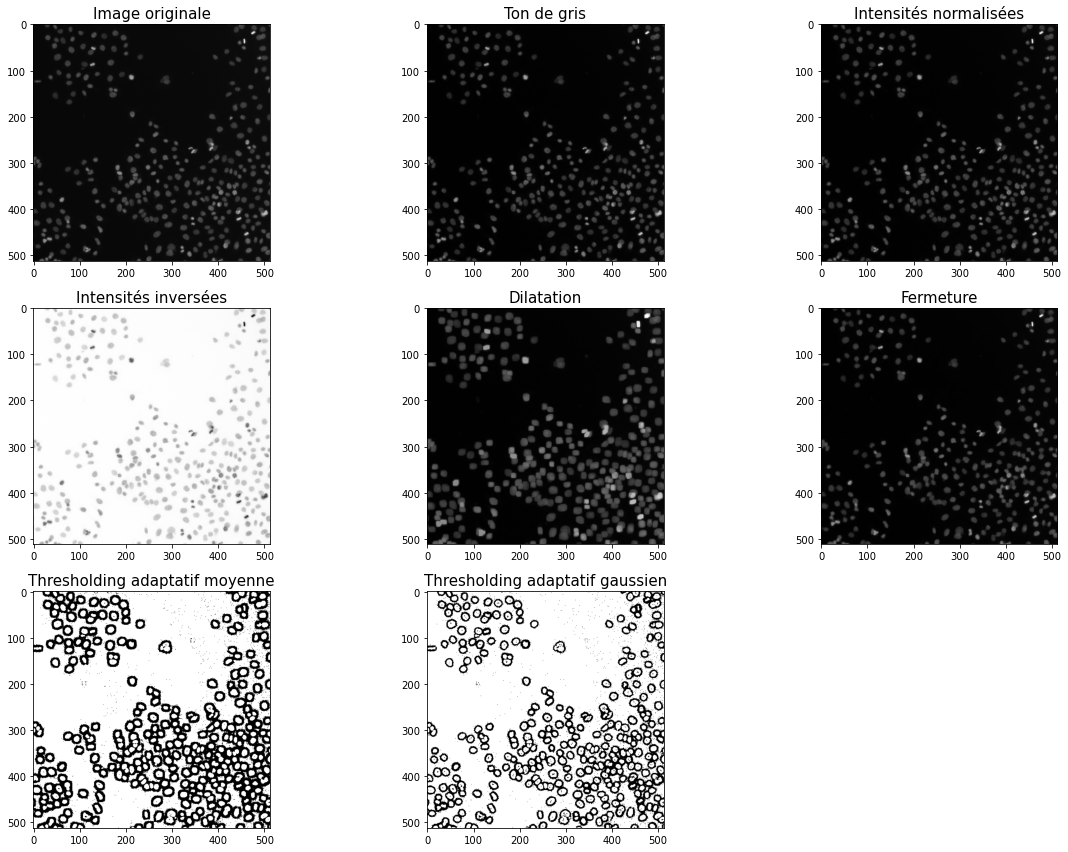

Nombre total de cellules: 288


In [57]:
# Lire l'image
cellules = cv2.imread('tp4_ex2.tif')

# Convertir l'image en tons de gris
cellules_gris = cv2.cvtColor(cellules, cv2.COLOR_BGR2GRAY)

# Normaliser les intensités
cellules_norm = cellules_gris / np.max(cellules_gris)

# Inverser les intensités
cellules_inv = np.abs(cellules_norm-1)

# Oppératios morphologiques
kernel = np.ones((5, 5), np.uint8)
dilatation = cv2.dilate(cellules_gris, kernel, iterations = 1)
fermeture = cv2.morphologyEx(cellules_gris, cv2.MORPH_CLOSE, kernel)

# Thresholding adaptatif sur la moyenne et le filtre gaussien
th_moy = cv2.adaptiveThreshold(cellules_gris, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th_gauss = cv2.adaptiveThreshold(cellules_gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(20,20))
plt.subplot(431)
plt.title('Image originale', fontsize=15)
plt.imshow(cellules, cmap='gray')
plt.subplot(432)
plt.title('Ton de gris', fontsize=15)
plt.imshow(cellules_gris, cmap='gray')
plt.subplot(433)
plt.title('Intensités normalisées', fontsize=15)
plt.imshow(cellules_norm, cmap='gray')
plt.subplot(434)
plt.title('Intensités inversées', fontsize=15)
plt.imshow(cellules_inv, cmap='gray')
plt.subplot(435)
plt.title('Dilatation', fontsize=15)
plt.imshow(dilatation, cmap='gray')
plt.subplot(436)
plt.title('Fermeture', fontsize=15)
plt.imshow(fermeture, cmap='gray')
plt.subplot(437)
plt.title('Thresholding adaptatif moyenne', fontsize=15)
plt.imshow(th_moy, cmap='gray')
plt.subplot(438)
plt.title('Thresholding adaptatif gaussien', fontsize=15)
plt.imshow(th_gauss, cmap='gray')
plt.show()

# Compter les cellules
thresholds = filters.threshold_multiotsu(cellules_gris, classes=3)
regions = np.digitize(image, bins=thresholds)
cells = image > thresholds[0]
labeled_cells = measure.label(cells)

print('Nombre total de cellules:', labeled_cells.max())
